# **Projeto 1 - EBA**
## Desafio Ifood

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EBA/ifood_mkt_data.csv')
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


- Quantas linhas e colunas?
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

In [ ]:
# Número de linha e colunas
df.shape

(2205, 44)

### Tipos de dados

In [ ]:
# Verificando o tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

### Nulos

In [ ]:
# Verificando os valores nulos
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [ ]:
def CalculaPorcentageNulos(coluna):
    nulos = df[coluna].isnull().sum()
    total = df[coluna].count() + nulos
    porcentagem_nulos = (nulos / total) * 100
    registros_validos = total - nulos

    print(f'Coluna: {coluna}, Nulos: {porcentagem_nulos:.2f}% - Validos: {registros_validos} - Total: {total}')

In [ ]:
CalculaPorcentageNulos('marital_Divorced')
CalculaPorcentageNulos('marital_Married' )
CalculaPorcentageNulos('marital_Single')
CalculaPorcentageNulos('marital_Together')
CalculaPorcentageNulos('marital_Widow')
CalculaPorcentageNulos('education_2n Cycle')
CalculaPorcentageNulos('education_Basic')
CalculaPorcentageNulos('education_Graduation')
CalculaPorcentageNulos('education_PhD')

Coluna: marital_Divorced, Nulos: 89.57% - Validos: 230 - Total: 2205
Coluna: marital_Married, Nulos: 61.27% - Validos: 854 - Total: 2205
Coluna: marital_Single, Nulos: 78.37% - Validos: 477 - Total: 2205
Coluna: marital_Together, Nulos: 74.24% - Validos: 568 - Total: 2205
Coluna: marital_Widow, Nulos: 96.55% - Validos: 76 - Total: 2205
Coluna: education_2n Cycle, Nulos: 91.02% - Validos: 198 - Total: 2205
Coluna: education_Basic, Nulos: 97.55% - Validos: 54 - Total: 2205
Coluna: education_Graduation, Nulos: 49.52% - Validos: 1113 - Total: 2205
Coluna: education_PhD, Nulos: 78.41% - Validos: 476 - Total: 2205


### Duplicados

In [ ]:
# Verificando valores duplicados
df.duplicated().sum()

0

Não existem dados duplicados no conjunto de dados

### Medidas dos conjunto

In [ ]:
# Verificando algumas medidas do conjunto de dados
df.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,198.0,54.0,1113.0,364.0,476.0,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,1.0,2.0,3.0,4.0,5.0,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.0,0.0,0.0,0.0,0.0,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,1.0,2.0,3.0,4.0,5.0,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.00000,3.000000,2491.000000


### Qual é o maior salário encontrado na nossa base?

In [ ]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2200    61223.0
2201    64014.0
2202    56981.0
2203    69245.0
2204    52869.0
Name: Income, Length: 2205, dtype: float64

In [ ]:
max(df['Income'])

113734.0

### Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?

In [ ]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

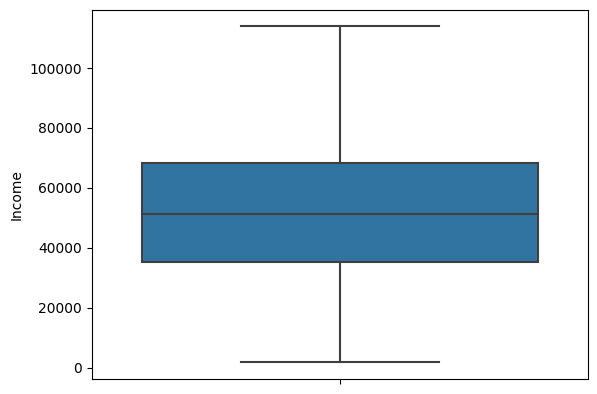

In [ ]:
sns.boxplot(data=df, y='Income')
plt.show()

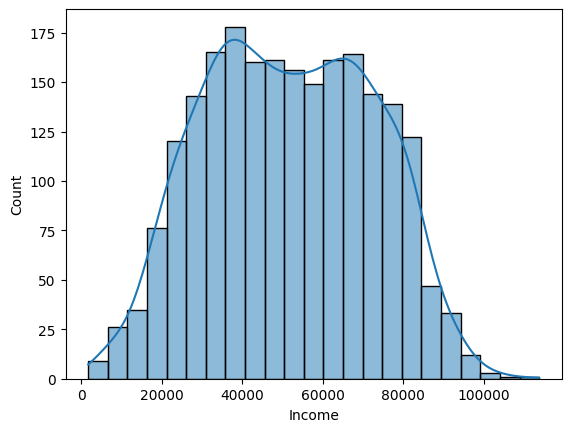

In [ ]:
sns.histplot(data=df, x='Income', kde=True)
plt.show()